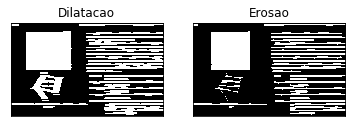

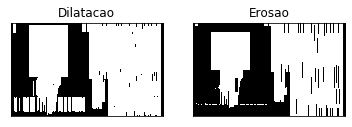

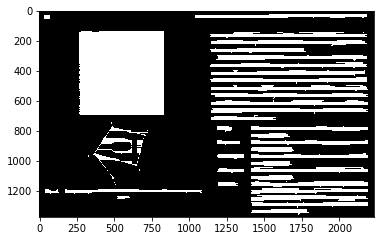

52  ---  38


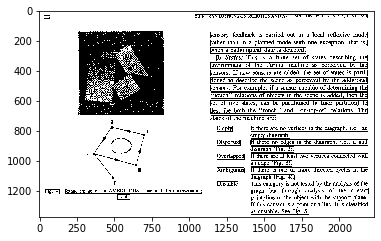

True

In [2]:
# TRABALHO 4 de MC920 
# Aluno: Miguel Augusto Silva Guida     RA: 174847



import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('bitmap.pbm', 0)

# inverter a imagem
img[img == 0] = 1
img[img == 255] = 0


# conta quantas transicoes de preto p/branco tem na horizontal
def horizontalTransitions(array):
    count = 0
    x, y = np.shape(array)
    for i in range(0,x):
        for j in range(0,y -1):
            if array[i][j] != array[i][j+1]:
                count += 1
    return count

# conta quantas transicoes de preto p/branco tem na vertical
def verticalTransitions(array):
    count = 0
    x, y = np.shape(array)
    for i in range(0,x -1):
        for j in range(0,y):
            if array[i][j] != array[i+1][j]:
                count += 1
    return count


# ----- Segmentação por linhas -----


# PASSOS DO TRABALHO
kernel = np.ones((1, 100),np.uint8) #12 para separar palavras
# 1 DILATACAO
dilation = cv2.dilate(img,kernel,iterations = 1)
# 2 EROSAO
erosion1 = cv2.erode(dilation,kernel,iterations = 1)

cv2.imwrite('dilation1-lines.pbm', dilation)
cv2.imwrite('erosion1-lines.pbm', erosion1)

plt.subplot(121),plt.imshow(dilation, cmap = 'gray')
plt.title('Dilatacao'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion1, cmap = 'gray')
plt.title('Erosao'), plt.xticks([]), plt.yticks([])
plt.show()

kernel = np.ones((200, 1),np.uint8) #20 para separar palavras
# 3 DILATACAO
dilation = cv2.dilate(img,kernel,iterations = 1)
# 4 EROSAO
erosion2 = cv2.erode(dilation,kernel,iterations = 1)

cv2.imwrite('dilation2-lines.pbm', dilation)
cv2.imwrite('erosion2-lines.pbm', erosion2)

plt.subplot(121),plt.imshow(dilation, cmap = 'gray')
plt.title('Dilatacao'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion2, cmap = 'gray')
plt.title('Erosao'), plt.xticks([]), plt.yticks([])
plt.show()

# 5
andArray = np.logical_and(erosion1, erosion2)

step5 = np.where(andArray, 1, 0)
step5 = np.uint8(step5)

cv2.imwrite('step5-lines.pbm', step5)

# 6
kernel = np.ones((1, 30),np.uint8) #12 para separar palavras
closing = cv2.morphologyEx(step5, cv2.MORPH_CLOSE, kernel)

cv2.imwrite('closing-lines.pbm', closing)

plt.imshow(closing, cmap='gray')
plt.show()


# 7
contours, hier = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#volta imagem para seu estado inicial.
img[img == 0] = 255
img[img == 1] = 0
img[img == 255] = 1

        
regioesClassificadas = 0
for c in contours:
    # pega dimensoes do retangulo
    x, y, w, h = cv2.boundingRect(c)
    
    
    array = img[y:y+h, x:x+w]
    black = array[array == 0].size
    white = array[array == 255].size
    black_ratio = black/array.size
    horz = horizontalTransitions(array)
    vert = verticalTransitions(array)
    trans_ratio = (horz + vert)/(black +1)
    #print(x, x+w, y, y+h, np.shape(array), " --- ",black, white, " --- ", trans_ratio)
    
    # desenha retangulo apenas se ele eh classificado como texto.
    if(black_ratio > 0.1) & (black_ratio < 0.8) & (trans_ratio > 0.60) :
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        regioesClassificadas += 1
    

    

print(len(contours), " --- ", regioesClassificadas)
plt.imshow(img, cmap='gray')
plt.show()

cv2.imwrite('contours-lines.pbm', img)




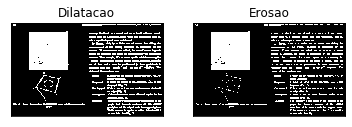

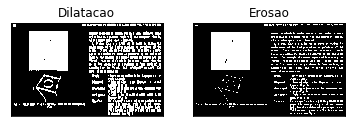

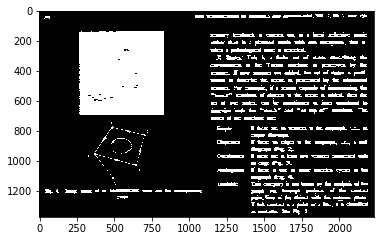

312  ---  289


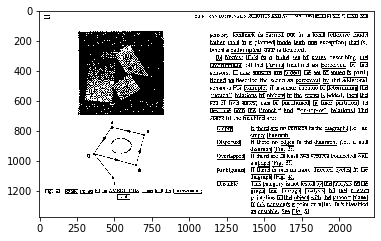

True

In [5]:
# ----- Segmentação por palavras -----


img = cv2.imread('bitmap.pbm', 0)

# inverter a imagem
img[img == 0] = 1
img[img == 255] = 0

# PASSOS DO TRABALHO
kernel = np.ones((1, 12),np.uint8) #12 para separar palavras
# 1 DILATACAO
dilation = cv2.dilate(img,kernel,iterations = 1)
# 2 EROSAO
erosion1 = cv2.erode(dilation,kernel,iterations = 1)

cv2.imwrite('dilation1-words.pbm', dilation)
cv2.imwrite('erosion1-words.pbm', erosion1)

plt.subplot(121),plt.imshow(dilation, cmap = 'gray')
plt.title('Dilatacao'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion1, cmap = 'gray')
plt.title('Erosao'), plt.xticks([]), plt.yticks([])
plt.show()

kernel = np.ones((20, 1),np.uint8) #20 para separar palavras
# 3 DILATACAO
dilation = cv2.dilate(img,kernel,iterations = 1)
# 4 EROSAO
erosion2 = cv2.erode(dilation,kernel,iterations = 1)

cv2.imwrite('dilation2-words.pbm', dilation)
cv2.imwrite('erosion2-words.pbm', erosion2)

plt.subplot(121),plt.imshow(dilation, cmap = 'gray')
plt.title('Dilatacao'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion2, cmap = 'gray')
plt.title('Erosao'), plt.xticks([]), plt.yticks([])
plt.show()

# 5
andArray = np.logical_and(erosion1, erosion2)

step5 = np.where(andArray, 1, 0)
step5 = np.uint8(step5)

cv2.imwrite('step5-words.pbm', step5)

# 6
kernel = np.ones((1, 12),np.uint8) #12 para separar palavras
closing = cv2.morphologyEx(step5, cv2.MORPH_CLOSE, kernel)

cv2.imwrite('closing-words.pbm', closing)

plt.imshow(closing, cmap='gray')
plt.show()


# 7
contours, hier = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#volta imagem para seu estado inicial.
img[img == 0] = 255
img[img == 1] = 0
img[img == 255] = 1

        
regioesClassificadas = 0
for c in contours:
    # pega dimensoes do retangulo
    x, y, w, h = cv2.boundingRect(c)
    
    
    array = img[y:y+h, x:x+w]
    black = array[array == 0].size
    white = array[array == 255].size
    black_ratio = black/array.size
    horz = horizontalTransitions(array)
    vert = verticalTransitions(array)
    #print(x, x+w, y, y+h, np.shape(array), " --- ",black, white, " --- ", black_ratio)
    
    # desenha retangulo apenas se ele eh classificado como texto.
    if(black_ratio > 0.1) & (black_ratio < 0.8):
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        regioesClassificadas += 1
    

    

print(len(contours), " --- ", regioesClassificadas)
plt.imshow(img, cmap='gray')
plt.show()

cv2.imwrite('contours-words.pbm', img)

